## Predicting House Prices in Bengaluru

### Table of contents:
* [Data Understanding](#1.0)


* [Data Cleaning](#2.0)
    * [Locations](#2.1)
    * [Societies](#2.2)
    * [Availability](#2.3)
    * [Total sqft](#2.4)
    * [Size](#2.5)
    * [Bath](#2.6)
    * [Balcony](#2.7)
    * [Price](#2.8)
    * [Area Type](#2.9)
    * [Removing Overall Outliers](#2.99)
   
    
* [Data Visualization](#3.0)
    * [Correlation heatmap](#3.1)


    
* [Model](#third-bullet) (Needs to be changed)

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [320]:
df_train = pd.read_csv('Predicting-House-Prices-In-Bengaluru-Train-Data.csv')

### Data Understanding <a class="anchor" id="1.0"></a>

In [321]:
df_train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [322]:
df_train.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [323]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
society,5502,0.413063
balcony,609,0.045721
bath,73,0.005480
size,16,0.001201
location,1,0.000075
price,0,0.000000
total_sqft,0,0.000000
availability,0,0.000000
area_type,0,0.000000


In [324]:
#unique number of listings in 'society'
df_train['society'].nunique()

2688

In [325]:
#unique number of listings in 'location'
df_train['location'].nunique()

1305

In [326]:
#df_train.groupby(['location']).nunique()

In [327]:
list(df_train['size'].unique())

['2 BHK',
 '4 Bedroom',
 '3 BHK',
 '4 BHK',
 '6 Bedroom',
 '3 Bedroom',
 '1 BHK',
 '1 RK',
 '1 Bedroom',
 '8 Bedroom',
 '2 Bedroom',
 '7 Bedroom',
 '5 BHK',
 '7 BHK',
 '6 BHK',
 '5 Bedroom',
 '11 BHK',
 '9 BHK',
 nan,
 '9 Bedroom',
 '27 BHK',
 '10 Bedroom',
 '11 Bedroom',
 '10 BHK',
 '19 BHK',
 '16 BHK',
 '43 Bedroom',
 '14 BHK',
 '8 BHK',
 '12 Bedroom',
 '13 BHK',
 '18 Bedroom']

In [328]:
list(df_train['bath'].unique())

[2.0,
 5.0,
 3.0,
 4.0,
 6.0,
 1.0,
 9.0,
 nan,
 8.0,
 7.0,
 11.0,
 10.0,
 14.0,
 27.0,
 12.0,
 16.0,
 40.0,
 15.0,
 13.0,
 18.0]

### Data Cleaning <a class="anchor" id="2.0"></a>

| Outliers | Irregular cardinality   | Missing values |
|----------|-------------------------|----------------|
|Bath      |   BHK                   |  Society       |
|Sqft      |   Size                  |  Balcony       |
|Balcony   |   Location              |  Bath          |
|          |                         |  Size          |
|          |                         |  Location      |

#### Locations <a class="anchor" id="2.1"></a>

In [ ]:
df_train['location'].value_counts()

In [330]:
df_train.fillna(0, inplace=True)

#### Approach to cleaning 

* Found list of locations on 99acres website, check for their occurrence in the train set and then clean
* Make a huge function with many vectorized functions to apply on test data

#### Observations

* Varthur and Varathur road are 2 different places
* There exists a Belathur and a Belatur colony
* Rajarajeshwari different from Raja Rajeshwari Nagar
* Dodda Nekkundi and Dodda Nekkundi Extension are 15 mins away from each other, leave them as they are
* Domlur and Domlur Layout are the same place
* Nagavarapalya and Nagavara are 30 mins apart
* Doddakammanahalli and Kammanahalli are 1 hour 30 apart
* KSRTC Layout different from TC Palaya
* Kalkere and Kalkere Channasandra are 6 mins away, changed both to 'Kalkere'
* Gunjur vs. Gunjur Palya are 4 mins away, changed both to 'Gunjur' 
* Doddanakundi Industrial Area 2 is 20mins away from Doddanekundi, however there are irregular cardinalities in the listing of 'Doddanakundi' e.g. 'Doddanakunte'- so will change all 'Doddanakundi' to Doddanakundi and leave Doddanakundi Industrial listings remaining
* Howthinarayanappa Garden is a real place lol
* Narayanappa Garden and  Narayanappa Layout are an hour apart
* Lots of variations of 'Hennur' -road, gardens, busstop, bande- only 15 mins apart, change all to Hennur
* Chikka-, Dodda-, Horamavu-,-Banaswadi are all 2km apart. Change all to 'Banaswadi' as listed on 99 acres
* Amruthnagar and Amruthahalli are 6 mins away- leave be
* Ullal Uppanagar, Ullal RTO and Ullal Road are within 4km vicinity
* Frazer Town is the same as Pulikeshi Nagar
* OLd Gurappanapalya and Gurappana palya are different
* Chikkabanavar is Chikkabanavara on google maps, leave it be

In [336]:
def cleanLocation(df):
    df_train.loc[df_train['location'].str.contains('white', case=False, na=False), 'location'] = 'Whitefield'
    df_train.loc[df_train['location'].str.contains('Sarjapur Road', case=False, na=False), 'location'] = 'Sarjapur Road'
    df_train.loc[df_train['location'].str.contains('godi', case=False, na=False), 'location'] = 'Kadugodi'
    df_train.loc[df_train['location'].str.contains('Bagalur', case=False, na=False), 'location'] = 'Bagalur'
    df_train.loc[df_train['location'].str.contains('Iggalur', case=False, na=False), 'location'] = 'Haralur Road'
    df_train.loc[df_train['location'].str.contains('Ramamurthy', case=False, na=False), 'location'] = 'Ramamurthy Nagar'
    df_train.loc[df_train['location'].str.contains('Kundalahalli Colony', case=False, na=False), 'location'] = 'Kundalahalli'
    df_train.loc[df_train['location'].str.contains('Old Airport Road', case=False, na=False), 'location'] = 'Old Airport Road'
    df_train.loc[df_train['location'].str.contains('Near International Airport', case=False, na=False), 'location'] = 'Devanahalli Int. Airport'
    df_train.loc[df_train['location'].str.contains('airport', case=False, na=False), 'location'] = 'Old Airport Road'
    df_train.loc[df_train['location'].str.contains('madras', case=False, na=False), 'location'] = 'Old Madras Road'
    df_train.loc[df_train['location'].str.contains('Maratha', case=False, na=False), 'location'] = 'Marathahalli'
    df_train.loc[df_train['location'].str.contains('Panathur', case=False, na=False), 'location'] = 'Panathur Road'
    df_train.loc[df_train['location'].str.contains('EPIP', case=False, na=False), 'location'] = 'EPIP Zone'
    df_train.loc[df_train['location'].str.contains('Kasavan', case=False, na=False), 'location'] = 'Kasavanhalli'
    df_train.loc[df_train['location'].str.contains('Mahade', case=False, na=False), 'location'] = 'Mahadevpura'
    df_train.loc[df_train['location'].str.contains('Thigala', case=False, na=False), 'location'] = 'Thigalarapalya'
    df_train.loc[df_train['location'].str.contains('Belatur', case=False, na=False), 'location'] = 'Belatur colony'
    df_train.loc[df_train['location'].str.contains('Belathur', case=False, na=False), 'location'] = 'Belathur'
    df_train.loc[df_train['location'].str.contains('Kaggad', case=False, na=False), 'location'] = 'Kaggadasapura'
    df_train.loc[df_train['location'].str.contains('Banashankari', case=False, na=False), 'location'] = 'Banashankari'
    df_train.loc[df_train['location'].str.contains('banshankari', case=False, na=False), 'location'] = 'Banashankari'
    df_train.loc[df_train['location'].str.contains('Koramangala', case=False, na=False), 'location'] = 'Koramangala'
    df_train.loc[df_train['location'].str.contains('Rajarajeshwari', case=False, na=False), 'location'] = 'Rajarajeshwari Nagar'
    df_train.loc[df_train['location'].str.contains('Raja Rajeshwari', case=False, na=False), 'location'] = 'Raja Rajeshwari Nagar'
    df_train.loc[df_train['location'].str.contains('Hoodi', case=False, na=False), 'location'] = 'Hoodi'
    df_train.loc[df_train['location'].str.contains('Immadihalli', case=False, na=False), 'location'] = 'Immadihalli'
    df_train.loc[df_train['location'].str.contains('Defence Colony', case=False, na=False), 'location'] = 'Defence Colony'
    df_train.loc[df_train['location'].str.contains('Defence Layout', case=False, na=False), 'location'] = 'Defence Layout'
    df_train.loc[df_train['location'].str.contains('OMBR', case=False, na=False), 'location'] = 'OMBR Layout'
    df_train.loc[df_train['location'].str.contains('Lakshminarayana', case=False, na=False), 'location'] = 'Lakshminarayana Pura'
    df_train.loc[df_train['location'].str.contains('Domma', case=False, na=False), 'location'] = 'Dommasandra'
    df_train.loc[df_train['location'].str.contains('Domlur', case=False, na=False), 'location'] = 'Domlur'
    df_train.loc[df_train['location'].str.contains('Cambridge', case=False, na=False), 'location'] = 'Cambridge Layout'
    df_train.loc[df_train['location'].str.contains('AECS', case=False, na=False), 'location'] = 'AECS Layout'
    df_train.loc[df_train['location'].str.contains('Kammanahalli Main Road', case=False, na=False), 'location'] = 'Kammanahalli'
    df_train.loc[df_train['location'].str.contains('Ramaswamy', case=False, na=False), 'location'] = 'Kammanahalli'
    df_train.loc[df_train['location'].str.contains('Kodihal', case=False, na=False), 'location'] = 'Kodihalli'
    df_train.loc[df_train['location'].str.contains('Murugeshpalya', case=False, na=False), 'location'] = 'Murugeshpalya'
    df_train.loc[df_train['location'].str.contains('KRTC', case=False, na=False), 'location'] = 'KRTC Layout'
    df_train.loc[df_train['location'].str.contains('tc.p', case=False, na=False), 'location'] = 'TC Palaya'
    df_train.loc[df_train['location'].str.contains('Kalkere', case=False, na=False), 'location'] = 'Kalkere'
    df_train.loc[df_train['location'].str.contains('Gunjur', case=False, na=False), 'location'] = 'Gunjur'
    df_train.loc[df_train['location'].str.contains('Battarahalli', case=False, na=False), 'location'] = 'Battarahalli'
    df_train.loc[df_train['location'].str.contains('Doddanak', case=False, na=False), 'location'] = 'Doddanakundi Industrial Area 2'
    df_train.loc[df_train['location'].str.contains('Doddanakunte', case=False, na=False), 'location'] = 'Doddanekundi'
    df_train.loc[df_train['location'].str.contains('Doddane', case=False, na=False), 'location'] = 'Doddanekundi'
    df_train.loc[df_train['location'].str.contains('Howthinarayanappa', case=False, na=False), 'location'] = 'Howthinarayanappa Garden'
    df_train.loc[df_train['location'].str.contains('Prithvi', case=False, na=False), 'location'] = 'Prithvi Layout'
    df_train.loc[df_train['location'].str.contains('Kodbi', case=False, na=False), 'location'] = 'Kodbisanhalli'
    df_train.loc[df_train['location'].str.contains('Hennur Bande', case=False, na=False), 'location'] = 'Hennur Gardens'
    df_train.loc[df_train['location'].str.contains('Hennur R', case=False, na=False), 'location'] = 'Hennur'
    df_train.loc[df_train['location'].str.contains('Banaswadi', case=False, na=False), 'location'] = 'Banaswadi'
    df_train.loc[df_train['location'].str.contains('Kalyan', case=False, na=False), 'location'] = 'Kalyan nagar'
    df_train.loc[df_train['location'].str.contains('Lingaraja', case=False, na=False), 'location'] = 'Lingarajapuram'
    df_train.loc[df_train['location'].str.contains('Hoskote', case=False, na=False), 'location'] = 'Hoskote'
    df_train.loc[df_train['location'].str.contains('Geddal', case=False, na=False), 'location'] = 'Geddalahalli'
    df_train.loc[df_train['location'].str.contains('Kadugon', case=False, na=False), 'location'] = 'Kadugondanahalli'
    df_train.loc[df_train['location'].str.contains('Harap', case=False, na=False), 'location'] = 'Harappanahalli'
    df_train.loc[df_train['location'].str.contains('RTO ullal', case=False, na=False), 'location'] = 'Ullal RTO Office'
    df_train.loc[df_train['location'].str.contains('frazer', case=False, na=False), 'location'] = 'Frazer Town'
    df_train.loc[df_train['location'].str.contains('Pulikeshi Nagar', case=False, na=False), 'location'] = 'Frazer Town'
    df_train.loc[df_train['location'].str.contains('Mangammanapalya', case=False, na=False), 'location'] = 'Mangammanapalya'
    df_train.loc[df_train['location'].str.contains('Chikkatirup', case=False, na=False), 'location'] = 'Chikka Tirupathi'
    df_train.loc[df_train['location'].str.contains('Chikkaballapur', case=False, na=False), 'location'] = 'Chikkaballapura'
    df_train.loc[df_train['location'].str.contains('Kodichikka', case=False, na=False), 'location'] = 'Kodichikkanahalli'
    
    

In [337]:
cleanLocation(df)

#### Checking for occurrence of certain locations in the data

In [338]:
df_train[df_train['location'].str.contains('electronic',na=False,case=False)]

In [339]:
#Retrieved list of localities from 99 acres property website

Locations = ['Whitefield', 'Sarjapur Road','Kadugodi','Haralur Road','Varthur','CV Raman Nagar','Sarjapur','Ramamurthy Nagar','Kundalahalli','Old Madras Road',\
             'Marathahalli','Panathur','Munnekollal','Bhoganhalli','EPIP Zone','Kasavanhalli','Mahadevpura','Thigalarapalya','Belatur','Garudachar Palya',\
             'Kaggadasapura','Narayanapura','Ambalipura','Ambedkar Nagar','Brookefield','Indira Nagar','Balagere','Hoodi','Kothnur Narayanapura','Ramagondanahalli',\
             'Immadihalli',\
             'Kumbena Agrahara','Kasturi Nagar','KR Puram','ITPL','Rajiv Nagar','Rajiv Gandhi Nagar','Seegehalli','Sonnenahalli','Defence Colony','OMBR Layout',\
             'Kadubeesanahalli','Lakshminarayana Pura','Dommasandra','Dodda Nekkundi Extension','Subbannaiah Palya','Domlur','Nagavarapalya','Cambridge Layout','AECS Layout',\
             'Kammanahalli','Kodihalli','Murugeshpalya','TC Palaya','Old Airport Road','Kalkere','Gunjur','Battarahalli','Dodda Nekkundi','Narayanappa Garden',\
             'Belatur Colony','Prithvi Layout','Kodbisanhalli','Hennur Bande','Ardendale','Banaswadi','Outer Ring Road East','Kalyan nagar','Lingarajapuram',\
             'Hoskote','Geddalahalli','Kadugondanahalli','Harappanahalli','Marathi Layout','Amruthahalli','Mallathahalli','Lakshminarayana Pura','Ambedkar Colony','Ambedkar Nagar','Raja Rajeshwari Nagar','Rajaji Nagar','Brooke Bond First Cross','Gubbalala','Nagondanahalli',\
            'Benson Town', 'Crimson Layout']

In [340]:
x='Nagondanahalli'
x in Locations

True

In [341]:
#Locations in the data not listed on 99acres found while cleaning

bonus_locations = ['Amruthahalli','Mallathahalli','Ullal Uppanagar','Parappana Agrahara','Arekempanahalli','Gurappanapalya',\
                  'Basavangudi','Old Mangammanapalya Road','palya','garden','Agrahara','GB palya','Chikkagubbi','Lakshminarayanapura, Electronic City Phase 2']


#### Societies <a class="anchor" id="2.2"></a>

In [342]:
#shortcut/command for surrounding multiple strings with quotation marks? 

Societies = ['Propulsive Pinnacle',\
             'Prestige Shantiniketan',\
             'Purva 270',\
             'RI Elegance',\
             'Navya Nisarga',\
             'Hita Lirio',\
'Vrushabadri Towers',\
'Saptagiri Sannidhi']
# Divyasree Republic Of Whitefield
# Adarsh Palm Retreat
# Prestige Ferns Residency
# SNR Verity
# Brigade Cosmopolis
# Assetz 63 Degree East
# Prestige Ivy Terraces
# Veohm Vigneshwara Cedar Woods
# Purva Skydale
# Sobha Dream Acres
# Purva Whitehall
# Sobha Habitech
# Ravoos Rainbow
# Brigade Lakefront
# Jeevans Grandeur
# Adarsh Palm Retreat Condominius
# Rohan Iksha
# Mantri Espana
# Vasudha Springs
# Prestige Sunnyside
# SM Tranquil
# Purva Skywood
# Shriram Smrithi
# Shriram Greenfield
# Prestige Jade Pavilion
# Prestige Park View
# Prestige Lakeside Habitat
# Nishant Prime
# Mana Uber Verdant
# Brigade Exotica
# Mantri Glades
# Neeladri Paradise
# Shriram O2 Homes
# Samudrikaa Sunshine
# AR Tulips
# Ozone Evergreens
# DNR Atmosphere
# Sobha Jasmine
# Purva Sunshine
# Klassik Landmark
# Prestige Silversun
# DSR Ultima
# Nester Raga
# Hilife Greens
# SJR Palazza City
# Salarpuria Sattva East Crest
# Isha Misty Green
# DS MAX Skylishcious
# Total Raindrops Keep Falling On My Head
# Century Infiniti
# Total Windmills Of Your Mind
# Brigade Golden Triangle
# Basava Pride
# skylark Ithaca
# DS Max Skygrand
# Crystal Dew
# Raja Ritz Avenue
# MJ Lifestyle Avershine
# DSR Sunrise Towers
# Sterling Shalom Phase 2
# Divyasree 77 Place
# Keerthi Surya Shakti Towers]

### Availability <a class="anchor" id="2.3"></a>

Divide availability into categories based on month and'ready-to-move'

In [ ]:
list(df_train['availability'].unique())

In [317]:
object_columns = df_train.select_dtypes(['object']).columns
object_columns

Index([], dtype='object')

In [343]:
df_train.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [315]:
#Convert selected columns to type 'category' 
# for column in object_columns: 
#     df_train[column] = df_train[column].astype('category')
# df_train.dtypes

Was having trouble replacing categorical values so I reverted availability to type 'object'

In [345]:
df_train.loc[df_train['availability'].str.contains('Jan', case=False, na=False),'availability'] = 'Jan'
df_train.loc[df_train['availability'].str.contains('Feb', case=False, na=False),'availability'] = 'Feb'
df_train.loc[df_train['availability'].str.contains('Mar', case=False, na=False),'availability'] = 'Mar'
df_train.loc[df_train['availability'].str.contains('Apr', case=False, na=False),'availability'] = 'Apr'
df_train.loc[df_train['availability'].str.contains('May', case=False, na=False),'availability'] = 'May'
df_train.loc[df_train['availability'].str.contains('Jun', case=False, na=False),'availability'] = 'Jun'
df_train.loc[df_train['availability'].str.contains('Jul', case=False, na=False),'availability'] = 'Jul'
df_train.loc[df_train['availability'].str.contains('Aug', case=False, na=False),'availability'] = 'Aug'
df_train.loc[df_train['availability'].str.contains('Sep', case=False, na=False),'availability'] = 'Sep'
df_train.loc[df_train['availability'].str.contains('Oct', case=False, na=False),'availability'] = 'Oct'
df_train.loc[df_train['availability'].str.contains('Nov', case=False, na=False),'availability'] = 'Nov'
df_train.loc[df_train['availability'].str.contains('Dec', case=False, na=False),'availability'] = 'Dec'

In [371]:
list(df_train['availability'].unique())

['Dec',
 'Ready To Move',
 'May',
 'Feb',
 'Nov',
 'Oct',
 'Sep',
 'Mar',
 'Apr',
 'Aug',
 'Jun',
 'Jan',
 'Jul',
 'Immediate Possession']

### Total sqft <a class="anchor" id="2.4"></a>

#### Sqft column has:
    >Floats
    >Ranges
    >Irregular unit measurements e.g
    >'716Sq. Meter'
    > '1574Sq. Yards'
    >gunthas
    >acres

In hindsight I realise I did this cleaning in excel to I will need to do some future work on making functions to convert these units to sqft

<img src="http://i.imgur.com/dEd7bFG.gif">

In [ ]:
#Convert category 'size' to numeric
pd.to_numeric(df_train['total_sqft'], errors='coerce')

In [ ]:
#Thought I'd already done this but there were some NaN values present so here we go
df_train.fillna(0)

#### Sqft column has ranges
##### Approach: split sqft column based on '-' into 2 new columns- min and max sqrt_ft size

In [407]:
#sweet this works 
df_train[['min_sqft', 'max_sqft']] = df_train['total_sqft'].str.split('-',expand=True)

In [408]:
df_train[df_train['total_sqft'].str.contains(' - ')].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,min_sqft,max_sqft
30,Super built-up Area,Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,2100,2850
56,Built-up Area,Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,0.0,0.0,192.000,3010,3410
81,Built-up Area,Oct,Hennur,4 Bedroom,Gollela,2957 - 3450,0.0,0.0,224.500,2957,3450
122,Super built-up Area,Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,3067,8156
137,Super built-up Area,Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,1042,1105


In [409]:
#object to float
df_train[['min_sqft', 'max_sqft']] = df_train[['min_sqft', 'max_sqft']].astype(float)

### Size <a class="anchor" id="2.5"></a>

* Size represents how many bedrooms (BHK) a property has
* Lots of irregular cardinalities exist 
* After examining boxplots of the feature 'size', I am going to classify any listing greater than 11 BHK as an outlier

In [416]:
list(df_train['size'].unique())

['2 BHK',
 '4 Bedroom',
 '3 BHK',
 '4 BHK',
 '6 Bedroom',
 '3 Bedroom',
 '1 BHK',
 '1 RK',
 '1 Bedroom',
 '8 Bedroom',
 '2 Bedroom',
 '7 Bedroom',
 '5 BHK',
 '7 BHK',
 '6 BHK',
 '5 Bedroom',
 '11 BHK',
 '9 BHK',
 0,
 '9 Bedroom',
 '27 BHK',
 '10 Bedroom',
 '11 Bedroom',
 '10 BHK',
 '19 BHK',
 '16 BHK',
 '43 Bedroom',
 '14 BHK',
 '8 BHK',
 '12 Bedroom',
 '13 BHK',
 '18 Bedroom']

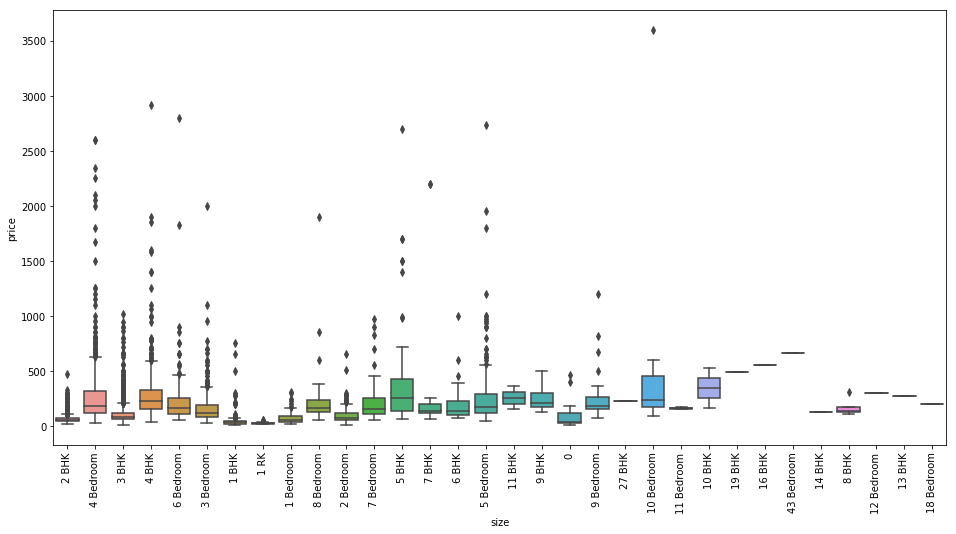

In [417]:
var = 'size'
data = pd.concat([df_train['price'], df_train[var]], axis=1)b
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var,y="price", data=df_train)
plt.xticks(rotation=90);

* 4 and 5 BHK seems to be the most common occurrence?
* There's also a significant amount of 10 BHK
* Lots of outliers exist here 

In [ ]:
df_train['size'].dropna()

In [419]:
df_train['size'].dtype

dtype('O')

In [420]:
df_train['size'] = df_train['size'].astype('category', ordered=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [424]:
#Rename columns to uniform BHK
#df['n'] = df['n'].replace({'a': 'x', 'b': 'y', 'c': 'w', 'd': 'z'})
df_train['size'] = df_train['size'].replace({'1 Bedroom': '1 BHK'})
df_train['size'] = df_train['size'].replace({'1 RK': '1 BHK'})
df_train['size'] = df_train['size'].replace({'2 Bedroom': '2 BHK'})
df_train['size'] = df_train['size'].replace({'3 Bedroom': '3 BHK'})
df_train['size'] = df_train['size'].replace({'4 Bedroom': '4 BHK'})
df_train['size'] = df_train['size'].replace({'5 Bedroom': '5 BHK'})
df_train['size'] = df_train['size'].replace({'6 Bedroom': '6 BHK'})
df_train['size'] = df_train['size'].replace({'7 Bedroom': '7 BHK'})
df_train['size'] = df_train['size'].replace({'8 Bedroom': '8 BHK'})
df_train['size'] = df_train['size'].replace({'9 Bedroom': '9 BHK'})
df_train['size'] = df_train['size'].replace({'10 Bedroom': '10 BHK'})
df_train['size'] = df_train['size'].replace({'11 Bedroom': '11 BHK'})
df_train['size'] = df_train['size'].replace({'12 Bedroom': '12 BHK'})
df_train['size'] = df_train['size'].replace({'43 Bedroom': '43 BHK'})
df_train['size'] = df_train['size'].replace({'18 Bedroom': '18 BHK'})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [426]:
#How to remove categorical columns greater than 11 BHK
df_train = df_train[df_train['size'] > '11 BHK']  

### Bath <a class="anchor" id="2.6"></a>

In [446]:
df_train['bath'].value_counts()

2.0     6864
3.0     3285
4.0     1223
5.0      523
6.0      272
1.0      179
7.0      101
8.0       62
0.0       50
9.0       40
10.0       7
12.0       4
13.0       2
11.0       1
14.0       1
Name: bath, dtype: int64

### Balcony <a class="anchor" id="2.7"></a>

In [447]:
df_train['balcony'].value_counts()

2.0    5074
1.0    4470
3.0    1663
0.0    1407
Name: balcony, dtype: int64

Bath and balcony seem pretty clean already

### Price <a class="anchor" id="2.8"></a>

In [ ]:
df_train['pr'].value_counts()

In [442]:
df_train['price'].describe()

count    12614.000000
mean       115.168731
std        146.170358
min         10.000000
25%         52.000000
50%         75.000000
75%        123.000000
max       2912.000000
Name: price, dtype: float64

### Area Type <a class="anchor" id="2.9"></a>

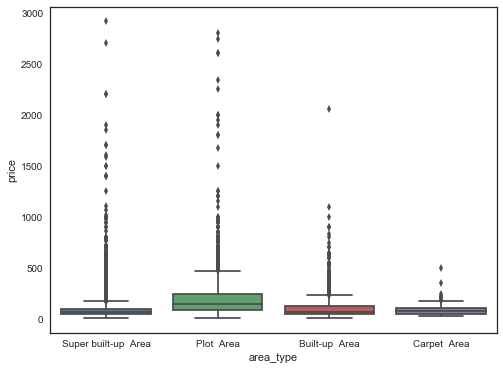

In [448]:
#box plot overallqual/saleprice
var = 'area_type'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=df_train)

### Data visualization <a class="anchor" id="3.0"></a>

In [411]:
import seaborn as sns

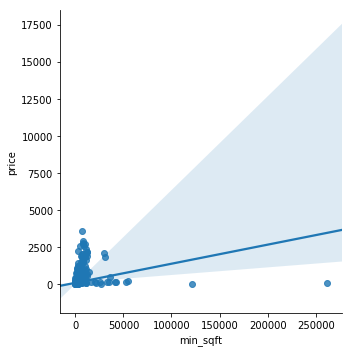

In [412]:
g = sns.lmplot(x="min_sqft", y="price", data=df_train)

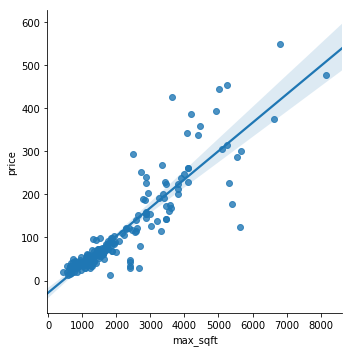

In [413]:
g = sns.lmplot(x="max_sqft", y="price", data=df_train)

Nice, linear relationship between price and max_sqft so this should prove a useful feature

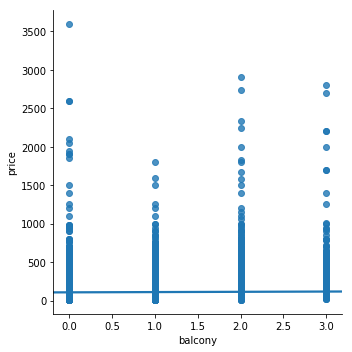

In [414]:
g = sns.lmplot(x="balcony", y="price", data=df_train)

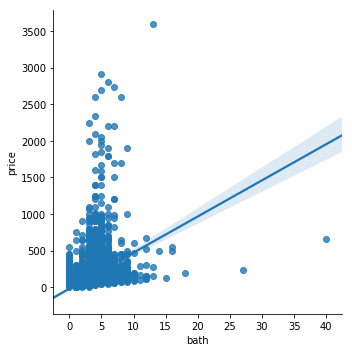

In [415]:
g = sns.lmplot(x="bath", y="price", data=df_train)

### Correlation heatmap <a class="anchor" id="3.1"></a>

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

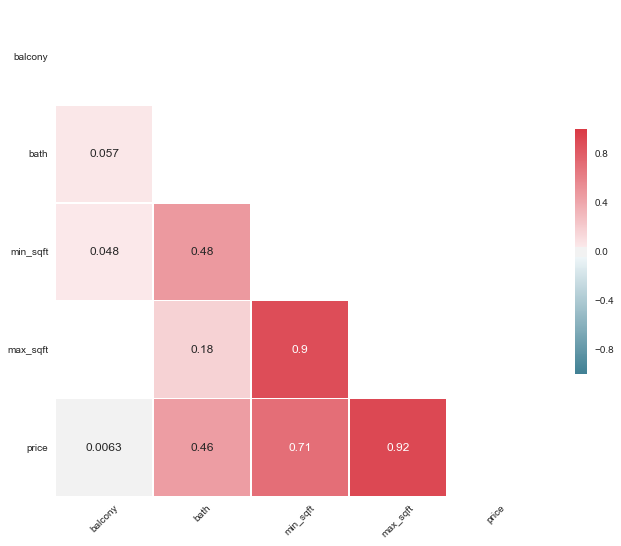

In [439]:
sns.set(style="white")

# Select columns containing continuous data
continuous_columns = df_train[['balcony','bath','min_sqft','max_sqft','price','size']].columns

# Calculate correlation of all pairs of continuous features
corr = df_train[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


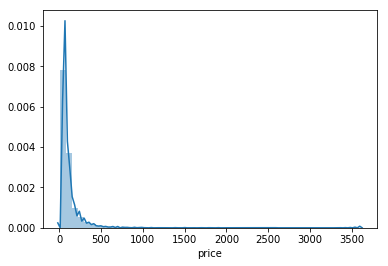

In [12]:
sns.distplot(df_train['price']);

In [13]:
#skewness and kurtosis
print("Skewness: %f" % df_train['price'].skew())
print("Kurtosis: %f" % df_train['price'].kurt())


Skewness: 8.064469
Kurtosis: 108.166513


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


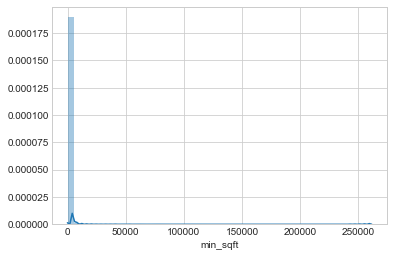

In [116]:
sns.distplot(df_train['min_sqft']);

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


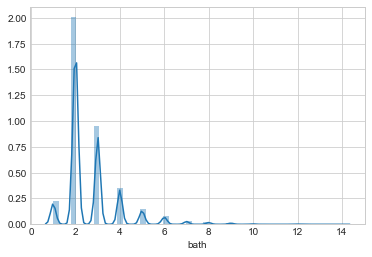

In [125]:
sns.distplot(df_classif['bath']);

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


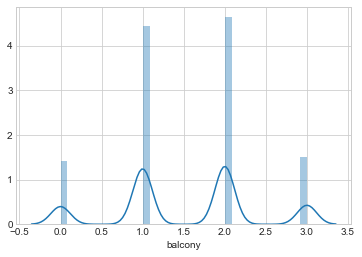

In [126]:
sns.distplot(df_classif['balcony']);

In [ ]:
#replace all figures in dataframe whose value is nan to 0
df3['size'].replace(['nan'], 0)

In [ ]:
df3['balcony'].fillna(0)
df3['bath'].fillna(0)
df3['price'].fillna(0)
df3['min_sqft'].fillna(0)

### Removing outliers <a class="anchor" id="2.99"></a>

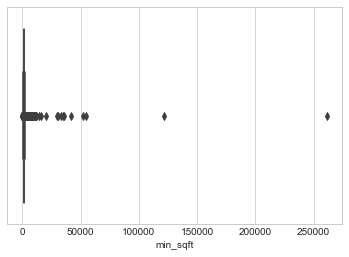

In [429]:
sns.set_style("whitegrid")
ax = sns.boxplot(x=df_train["min_sqft"])

Remove outliers greater than 100,000 min_sqft 

In [430]:
df_train = df_train[df_train['min_sqft'] < 30000]  

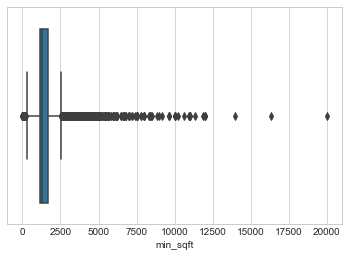

In [432]:
sns.set_style("whitegrid")
ax = sns.boxplot(x=df_train["min_sqft"])

Wait, what *is* the average sqft house range is in bengaluru..

In [1]:
#Trying to plot the mean sqft of house where size = 4 BHK

df_train.loc[df_train['size']=='4 BHK'].groupby(df_train['min_sqft']).sum().plot()

NameError: name 'df_train' is not defined

In [ ]:
df_train.loc[df_train['size']=='4 BHK'].plot()

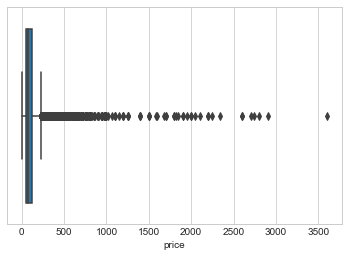

In [60]:
#Box plots for each category
sns.set_style("whitegrid")
ax = sns.boxplot(x=df3["price"])

This looks relatively normal spread to me? Will live with it for now

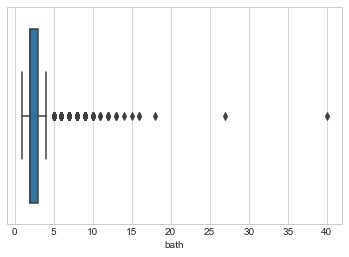

In [61]:
#Box plots for each category
sns.set_style("whitegrid")
ax = sns.boxplot(x=df3["bath"])

Remove rows with more than 15 baths, because that just seems ridiculous

In [433]:
df_train = df_train[df_train['bath'] < 15 ]  

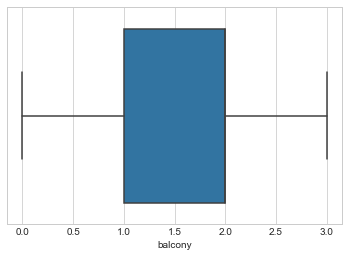

In [434]:
#Box plots for each category
sns.set_style("whitegrid")
ax = sns.boxplot(x=df_train["balcony"])

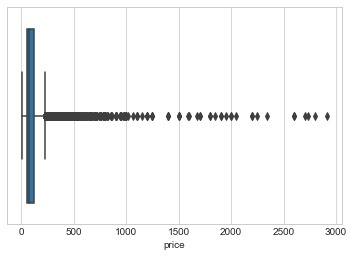

In [435]:
sns.set_style("whitegrid")
ax = sns.boxplot(x=df_train["price"])

Since I'm not getting a strong correlation with price- perhaps I should remove outliers in price- clamp figures greater than 2500 

#### Modelling 

In [42]:
from patsy import dmatrices
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Allows plots to appear directly in the notebook.
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
df3['price'].mean()

115.61851741884384

In [43]:
df3['min_sqft'].mean()

1631.9634557256525

In [65]:
PriceClass = (df3.price > 112.565626) * 1.0
#PriceClass
df_PriceClass = pd.DataFrame({'PriceClass': PriceClass})

In [66]:
# Crate a new dataframe where we add column PriceClass to the original dataframe with 10 offices.
df_classif = pd.concat([df3, df_PriceClass], axis = 1)
#df_classif.dropna()

In [67]:
# Drop the column price from the df_classif dataframe.
df_classif.drop('price', axis=1, inplace=True)

In [ ]:
df_classif.dropna()

In [83]:
df_classif.isnull().sum()

area_type           0
availability        0
location            1
size                0
society          5494
total_sqft          0
bath                0
balcony           533
min_sqft            0
max_sqft        13097
PriceClass          0
dtype: int64

In [90]:
#convert NaN to zero
df_classif['balcony']=df_classif['balcony'].fillna(0)

In [92]:
#df_classif['society']=df_classif['society'].fillna(0)

In [88]:
df_classif.isnull().sum()

area_type           0
availability        0
location            1
size                0
society          5494
total_sqft          0
bath                0
balcony             0
min_sqft            0
max_sqft        13097
PriceClass          0
dtype: int64

In [71]:
# Look at correlations for all the continuous features.
df_classif[['size', 'PriceClass', 'min_sqft','max_sqft','balcony','bath']].corr()

,PriceClass,min_sqft,max_sqft,balcony,bath
PriceClass,1.000000,0.188483,0.841719,0.133222,0.567920
min_sqft,0.188483,1.000000,0.918562,0.045008,0.165818
max_sqft,0.841719,0.918562,1.000000,NaN,0.824059
balcony,0.133222,0.045008,NaN,1.000000,0.226631
bath,0.567920,0.165818,0.824059,0.226631,1.000000


#### For the random forest let's try get it working with just continuous features for now:

    >min_sqft
    >balcony
    >bath
    >PriceClass

In [72]:
df_classif[['size', 'min_sqft']].corr().as_matrix()[0,1]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


IndexError: index 1 is out of bounds for axis 1 with size 1

In [80]:
# Prepare the data, turn categorical features into dummies.

# df_cont_feat = df_classif[['area_type', 'availability', 'location','size','society']]
# df_dummies_area_type = pd.get_dummies(df_classif[['area_type']])
# df_dummies_availability = pd.get_dummies(df_classif[['availability']])
# #df_dummies_location = pd.get_dummies(df_classif[['location']])
# df_dummies_size = pd.get_dummies(df_classif[['size']])
# #df_dummies_society = pd.get_dummies(df_classif[['society']])
# df_dummies_area_type.head()

#### Continous features

In [94]:
df_cont = df_classif[['min_sqft','balcony','bath']]

In [ ]:
# Add dummies to the other continuous features
#X = pd.concat([df_cont_feat,df_dummies_availability,df_dummies_location,df_dummies_size], axis =1)
X = df_cont
y = df_classif.PriceClass
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

In [96]:
# Instantiate sklearn estimator, fit with training set.
# Train a classification tree with max_depth=3 on all data.
dtc = DecisionTreeClassifier(max_depth=3, random_state=1)
dtc.fit(X, y)
print(dtc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')


In [97]:
type(dtc)

sklearn.tree.tree.DecisionTreeClassifier

In [98]:
# Compute the importance of each feature based on the trained decision tree classifier
pd.DataFrame({'feature': X.columns, 'importance': dtc.feature_importances_})

,feature,importance
0,min_sqft,0.854382
1,balcony,0.000000
2,bath,0.145618


In [100]:
# Alternative to print a tree in text format
"""
treeviz.py

A simple tree visualizer for sklearn DecisionTreeClassifiers.

Written by Lutz Hamel, (c) 2017 - Univeristy of Rhode Island
"""
import operator

def tree_print(clf, X):
    """
    Print the tree of a sklearn DecisionTreeClassifier

    Parameters
    ----------
    clf : DecisionTreeClassifier - A tree that has already been fit.
    X : The original training set
    """
    tlevel = _tree_rprint('', clf, X.columns, clf.classes_)
    print('<',end='')
    for i in range(3*tlevel - 2):
        print('-',end='')
    print('>')
    print('Tree Depth: ',tlevel)

def _tree_rprint(kword, clf, features, labels, node_index=0, tlevel_index=0):
    # Note: The DecisionTreeClassifier uses the Tree structure defined in:
    # 		github.com/scikit-learn/scikit-learn/blob/master/sklearn/tree/_tree.pyx
    #       it is an array based tree implementation:

    # indent the nodes according to their tree level
    for i in range(tlevel_index):
        print('  |',end='')

	#  TODO: the following should use the TREE_LEAF constant defined in _tree.pyx
	#        instead of -1, not quite sure how to get at it from the tree user level
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        print(kword, end=' ' if kword else '')
        # get the majority label
        count_list = clf.tree_.value[node_index, 0]
        max_index, max_value = max(enumerate(count_list), key=operator.itemgetter(1))
        max_label = labels[max_index]
        print(max_label)
        return tlevel_index
    
    else:
        # compute and print node label
        feature = features[clf.tree_.feature[node_index]]
        threshold = clf.tree_.threshold[node_index]
        print(kword, end=' ' if kword else '')
        print('if {} =< {}: '.format(feature, threshold))
        # recurse down the children
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        ltlevel_index = _tree_rprint('then', clf, features, labels, left_index, tlevel_index+1)
        rtlevel_index = _tree_rprint('else', clf, features, labels, right_index, tlevel_index+1)
        # return the maximum depth of either one of the children
        return max(ltlevel_index,rtlevel_index)

In [101]:
# Use the function tree_print defined above to plot a decision tree in text format
tree_print(dtc, X)

if min_sqft =< 1738.5: 
  |then if bath =< 3.5: 
  |  |then if min_sqft =< 1589.5: 
  |  |  |then 0.0
  |  |  |else 0.0
  |  |else if min_sqft =< 811.0: 
  |  |  |then 0.0
  |  |  |else 1.0
  |else if min_sqft =< 2025.5: 
  |  |then if min_sqft =< 1845.5: 
  |  |  |then 1.0
  |  |  |else 1.0
  |  |else if min_sqft =< 2202.0: 
  |  |  |then 1.0
  |  |  |else 1.0
<------->
Tree Depth:  3


#### Predict using trained decision tree

In [102]:
#Create a new example with descriptive features as below.
X_new = pd.DataFrame({'min_sqft': [730],  'balcony': [4], 'bath': [8]})
X_new.head()

,min_sqft,balcony,bath
0,730,4,8


In [103]:
dtc.predict(X_new)

array([0.])

In [104]:
dtc.predict_proba(X_new)

array([[0.77018634, 0.22981366]])

#### Evaluate model on full dataset

In [ ]:
predictions = dtc.predict(X)
df_true_vs_predicted = pd.DataFrame({'ActualClass': df_classif.PriceClass, 'PredictedClass': predictions})
df_true_vs_predicted

In [106]:
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

Accuracy:  0.8865644588777283
Confusion matrix: 
 [[8924  731]
 [ 771 2815]]
Classification report:
               precision    recall  f1-score   support

        0.0       0.92      0.92      0.92      9655
        1.0       0.79      0.78      0.79      3586

avg / total       0.89      0.89      0.89     13241



#### Evaluate on full test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Training data:\n", pd.concat([X_train, y_train], axis=1))
print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

In [108]:
# Refit the model on the training set only
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [ ]:
# Predict on the hold-out test set
predictions_test = dtc.predict(X_test)
df_true_vs_predicted_test = pd.DataFrame({'ActualClass': y_test, 'PredictedClass': predictions_test})

df_true_vs_predicted_test

In [110]:
print("Accuracy: ", metrics.accuracy_score(y_test, predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, predictions_test))

Accuracy:  0.8852252705763907
Confusion matrix: 
 [[2659  218]
 [ 238  858]]
Classification report:
               precision    recall  f1-score   support

        0.0       0.92      0.92      0.92      2877
        1.0       0.80      0.78      0.79      1096

avg / total       0.88      0.89      0.88      3973



In [111]:
# Evaluate the model using 3-fold cross-validation.
# Uses 2 parts of data for training and the last part for testing. 
# This process is repeated 3 times. More details about cross-validation here: http://www-bcf.usc.edu/~gareth/ISL/
scores = cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=1), X, y, scoring='accuracy', cv=3)
print(scores)
print(scores.mean())

[0.88697622 0.88148652 0.88511217]
0.88452496771396


#### Train a random forest classifier model

In [112]:
# Train RF with 100 trees
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)

In [113]:
# Fit model on full dataset
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [114]:
# Compute the importance of each feature based on the trained random forest classifier
# RF finds different feature importance than the single decision tree
# It finds both Size and Floor to be important features
# A downside is that we cannot interpret the RF with 100 trees as we could by looking at a single decision tree
# So this table is what we can use to interpret the trained model
pd.DataFrame({'feature': X.columns, 'importance':rfc.feature_importances_})

,feature,importance
0,min_sqft,0.684569
1,balcony,0.025461
2,bath,0.289971
